## Setting up the Server

In [1]:
import os
import json
import logging
import matplotlib.pyplot as plt
from src.util_functions import set_logger, save_plt

with open('config.json','r') as file:
    config = json.load(file) #Converts json file format into python dictionary
global_config = config["global_config"]
data_config = config["data_config"]
fed_config = config["fed_config"]
model_config = config["model_config"]

#Set Logger
set_logger(f"./Logs/log.txt")

In [3]:
from src.algorithms.FedAvgM.server import Server

server = Server(model_config,global_config, data_config, fed_config) #Initializes the Server with hyperparameters
logging.info("Server is successfully initialized")
server.setup()

Server is successfully initialized



Preparing Data
Files already downloaded and verified
Files already downloaded and verified

Dividing the data among clients
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]



Clients are successfully initialized


## Image utilities

In [4]:
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
import matplotlib.pyplot as plt

def imshow(img,label):
    img = img / 2 + 0.5
    img = img.permute(1,2,0)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Class: {classes[label]}') #Class of the random image.
    plt.show()

## Checking Server DataLoader

In [8]:
test_data = server.data #test dataloader
len(test_data) #Test data has about 10k images, batch_size=32, since 313*32=10016, last batch only contains about 16 images

313

In [9]:
#import itertools
#images, labels = next(itertools.islice(test_data,300,None))

In [10]:
images, labels = iter(test_data).next()

In [11]:
print(images.shape)
print(labels.shape)
print(labels)

torch.Size([32, 3, 32, 32])
torch.Size([32])
tensor([5, 1, 2, 1, 3, 9, 6, 0, 5, 5, 8, 7, 4, 1, 6, 9, 2, 2, 1, 8, 6, 8, 7, 7,
        8, 0, 1, 9, 6, 0, 8, 8])


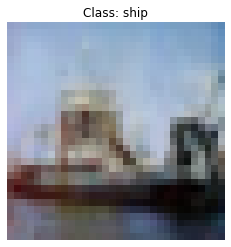

In [12]:
index = 21
img = images[index]
label = labels[index]
imshow(img,label)

## Checking Client DataLoaders

In [13]:
print(f"No.of.Clients:{len(server.clients)}")

No.of.Clients:100


In [14]:
client = server.clients[21]
print(client)

In [15]:
images,labels = iter(client.data).next()

In [16]:
print(images.shape)
print(labels.shape)

torch.Size([504, 3, 32, 32])
torch.Size([504])


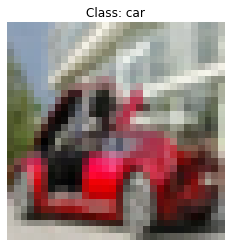

In [17]:
index = 21
img = images[index]
label = labels[index]
imshow(img,label)